In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
main_data = pd.read_csv('earthquake_data_tsunami.csv')

In [4]:
main_data

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,7.7,0,8,912,427,0.000,0.0,60.000,13.0490,-88.660,2001,1,0
778,6.9,5,7,745,0,0.000,0.0,36.400,56.7744,-153.281,2001,1,0
779,7.1,0,7,776,372,0.000,0.0,103.000,-14.9280,167.170,2001,1,0
780,6.8,0,5,711,64,0.000,0.0,33.000,6.6310,126.899,2001,1,0


In [5]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [7]:
from sklearn.model_selection import train_test_split

X = main_data.drop('tsunami', axis=1)
y = main_data['tsunami']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
train_data = X_train.join(y_train)

In [10]:
train_data

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
602,6.6,8,8,831,782,0.000,16.7,12.00,37.5350,138.446,2007,7,0
133,6.5,0,5,650,0,7.568,18.0,38.00,-58.6262,-25.304,2019,4,1
239,7.0,5,6,897,0,0.698,21.0,19.00,-37.3586,179.146,2016,9,1
55,6.9,5,4,738,0,1.173,36.0,20.74,55.2657,-157.680,2021,8,1
613,7.1,8,7,1023,744,0.000,29.1,10.00,21.7990,120.547,2006,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,7.0,7,7,1052,0,2.378,35.0,43.00,38.4752,141.607,2021,3,1
106,7.0,5,6,770,0,4.501,25.0,143.00,45.6161,148.959,2020,2,1
270,6.8,5,6,715,0,1.599,19.0,12.59,-8.8994,158.422,2015,11,1
435,6.7,0,7,691,370,0.000,15.4,16.00,-1.6170,134.276,2012,4,0


array([[<Axes: title={'center': 'magnitude'}>,
        <Axes: title={'center': 'cdi'}>, <Axes: title={'center': 'mmi'}>,
        <Axes: title={'center': 'sig'}>],
       [<Axes: title={'center': 'nst'}>,
        <Axes: title={'center': 'dmin'}>,
        <Axes: title={'center': 'gap'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'tsunami'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

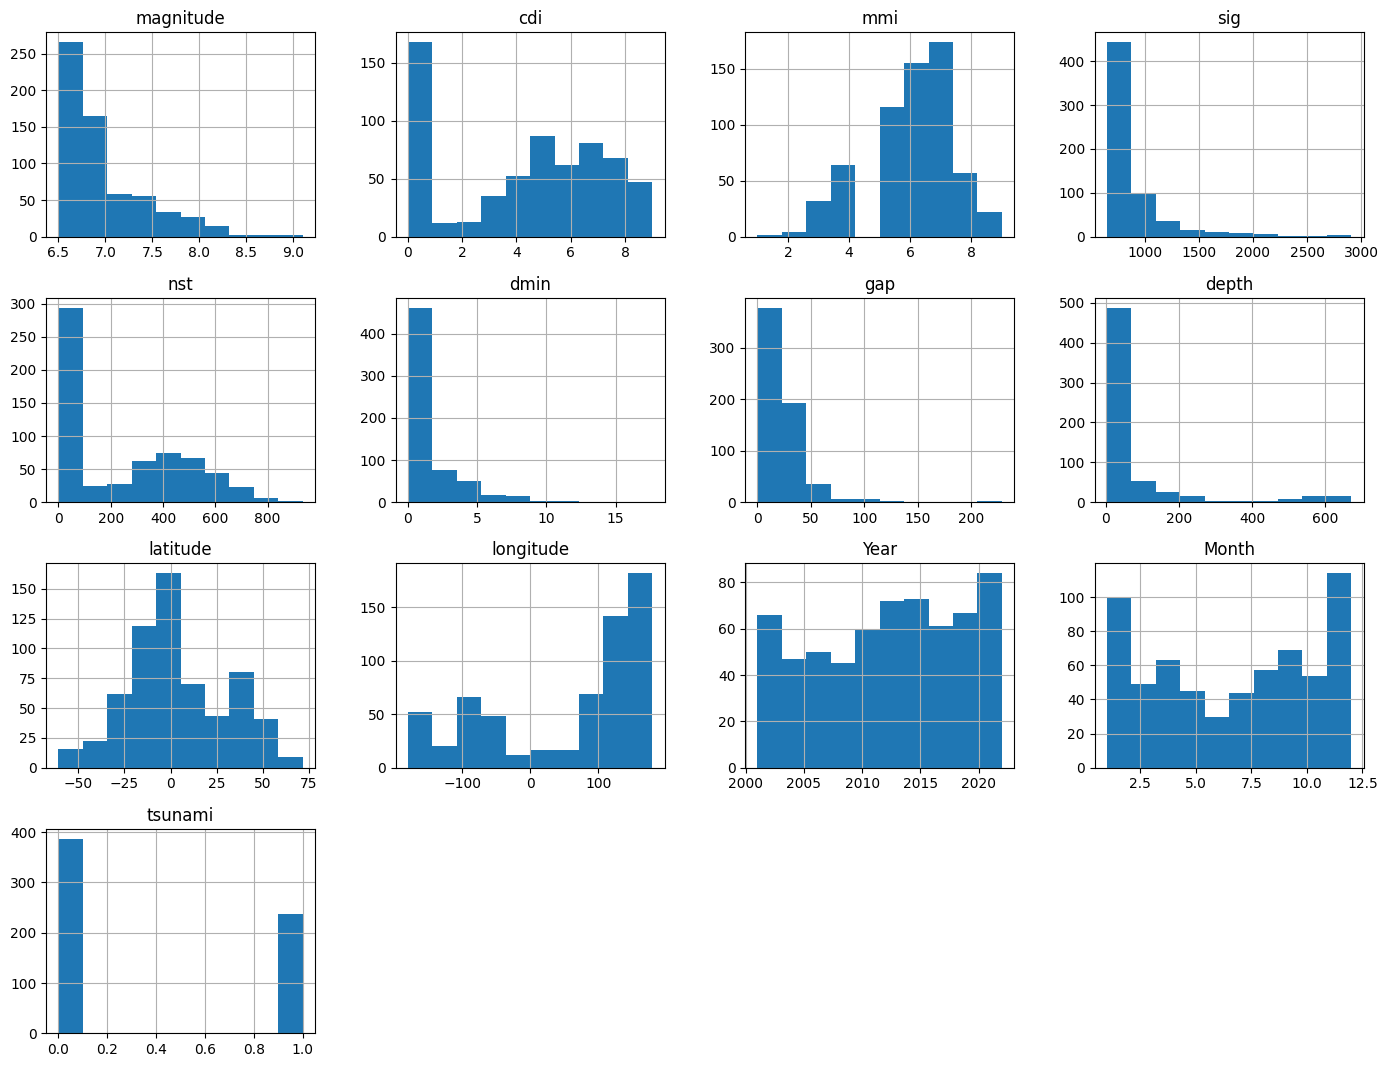

In [15]:
train_data.hist(figsize=(17,13))

<Axes: >

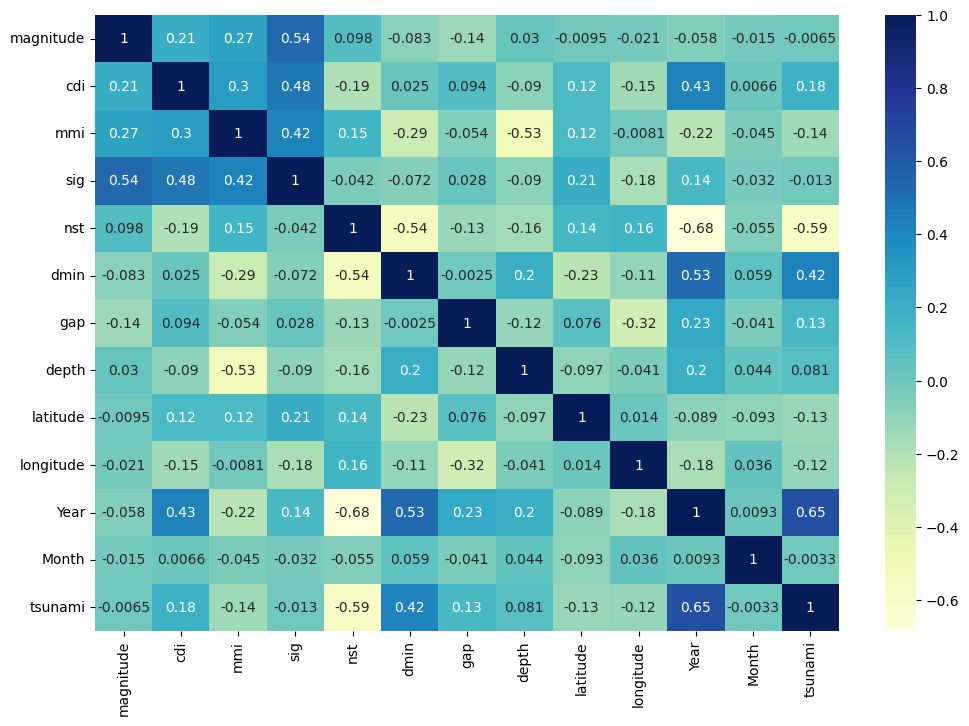

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [18]:
train_data['sig'] = np.log(train_data['sig'] + 1)
train_data['nst'] = np.log(train_data['nst'] + 1)
train_data['dmin'] = np.log(train_data['dmin'] + 1)
train_data['gap'] = np.log(train_data['gap'] + 1)
train_data['depth'] = np.log(train_data['depth'] + 1)

array([[<Axes: title={'center': 'magnitude'}>,
        <Axes: title={'center': 'cdi'}>, <Axes: title={'center': 'mmi'}>,
        <Axes: title={'center': 'sig'}>],
       [<Axes: title={'center': 'nst'}>,
        <Axes: title={'center': 'dmin'}>,
        <Axes: title={'center': 'gap'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'tsunami'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

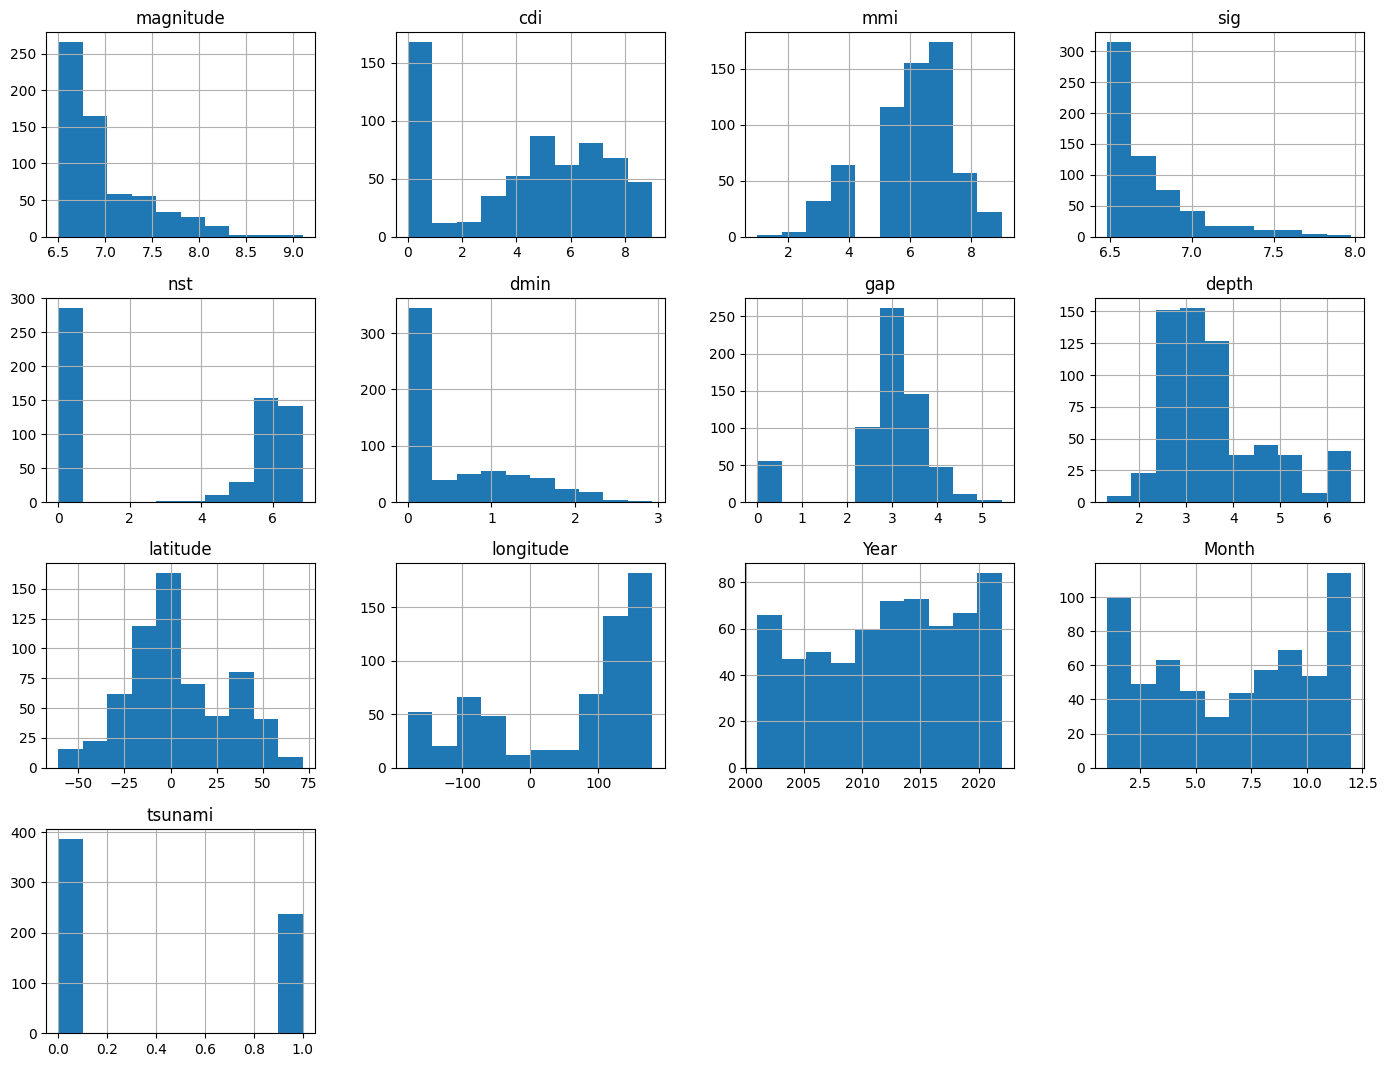

In [19]:
train_data.hist(figsize=(17,13))